**Iiris Flower Classification using Logistic Regression**

---



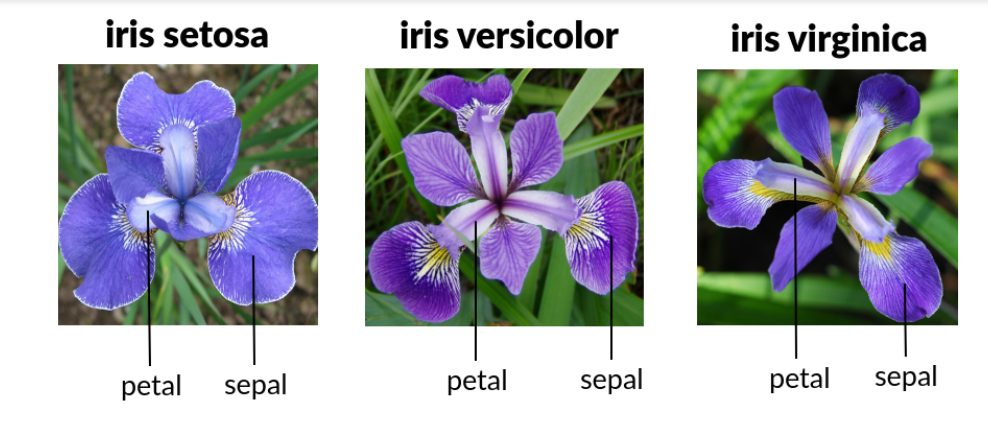

**Importing the libraries**

In [14]:
import pandas as pd

In [15]:
import matplotlib.pyplot as plt


**Loading the Data**

In [16]:
from google.colab import files


uploaded = files.upload()

Saving Iris.csv to Iris (1).csv


In [17]:
import numpy as np

In [18]:
df = pd.read_csv('Iris.csv')

**Viewing the Dataset**

In [19]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [20]:
df.info

<bound method DataFrame.info of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-seto

**Modifying the dataset by removing any Missing Values using fillna() method**

In [21]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**The Values are 0 meaning it has no Null Values all over the dataset**

**Viewing the Columns in the dataset**

In [22]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [23]:
df.describe

<bound method NDFrame.describe of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-se

In [24]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [25]:
df.shape

(150, 6)

In [26]:
print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [27]:
print(df[10:21])


    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
10  11            5.4           3.7            1.5           0.2  Iris-setosa
11  12            4.8           3.4            1.6           0.2  Iris-setosa
12  13            4.8           3.0            1.4           0.1  Iris-setosa
13  14            4.3           3.0            1.1           0.1  Iris-setosa
14  15            5.8           4.0            1.2           0.2  Iris-setosa
15  16            5.7           4.4            1.5           0.4  Iris-setosa
16  17            5.4           3.9            1.3           0.4  Iris-setosa
17  18            5.1           3.5            1.4           0.3  Iris-setosa
18  19            5.7           3.8            1.7           0.3  Iris-setosa
19  20            5.1           3.8            1.5           0.3  Iris-setosa
20  21            5.4           3.4            1.7           0.2  Iris-setosa


In [28]:
sliced_data=df[10:21]
print(sliced_data)

    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
10  11            5.4           3.7            1.5           0.2  Iris-setosa
11  12            4.8           3.4            1.6           0.2  Iris-setosa
12  13            4.8           3.0            1.4           0.1  Iris-setosa
13  14            4.3           3.0            1.1           0.1  Iris-setosa
14  15            5.8           4.0            1.2           0.2  Iris-setosa
15  16            5.7           4.4            1.5           0.4  Iris-setosa
16  17            5.4           3.9            1.3           0.4  Iris-setosa
17  18            5.1           3.5            1.4           0.3  Iris-setosa
18  19            5.7           3.8            1.7           0.3  Iris-setosa
19  20            5.1           3.8            1.5           0.3  Iris-setosa
20  21            5.4           3.4            1.7           0.2  Iris-setosa


In [29]:
specific_data=df[["Id","Species"]]


In [30]:
print(specific_data.head(10))


   Id      Species
0   1  Iris-setosa
1   2  Iris-setosa
2   3  Iris-setosa
3   4  Iris-setosa
4   5  Iris-setosa
5   6  Iris-setosa
6   7  Iris-setosa
7   8  Iris-setosa
8   9  Iris-setosa
9  10  Iris-setosa


In [31]:
df.iloc[5]


Id                         6
SepalLengthCm            5.4
SepalWidthCm             3.9
PetalLengthCm            1.7
PetalWidthCm             0.4
Species          Iris-setosa
Name: 5, dtype: object

In [32]:
df.loc[df["Species"] == "Iris-setosa"]


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [33]:
df["Species"].value_counts()


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [34]:
# data["column_name"].sum()
sum = df["SepalLengthCm"].sum()

In [35]:
print(sum)

876.5


In [36]:
mean = df["SepalLengthCm"].mean()

In [37]:
print(mean)

5.843333333333334


In [38]:
min = df["SepalLengthCm"].min()

In [39]:
print(min)

4.3


In [40]:
max = df["SepalLengthCm"].max()

In [41]:
df.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


**Data Visualization**

In [42]:
import seaborn as sns

In [43]:
iris = sns.load_dataset("iris")


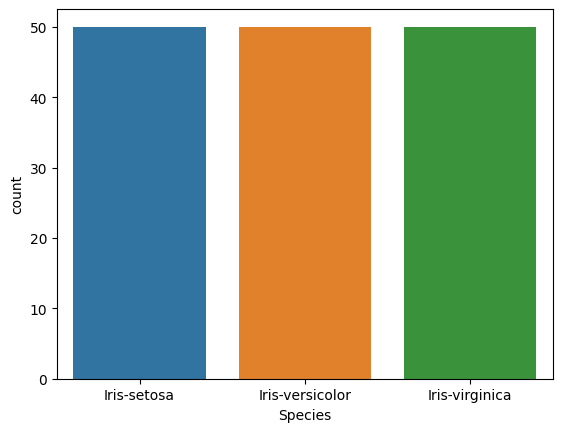

In [44]:
sns.countplot(x='Species', data=df, )
plt.show()

**According to the Plot the total rows are 150 and on which 50 are Iris-Setosa, 50 are Iris-Versicolor and 50 are Iris-Virginica**

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

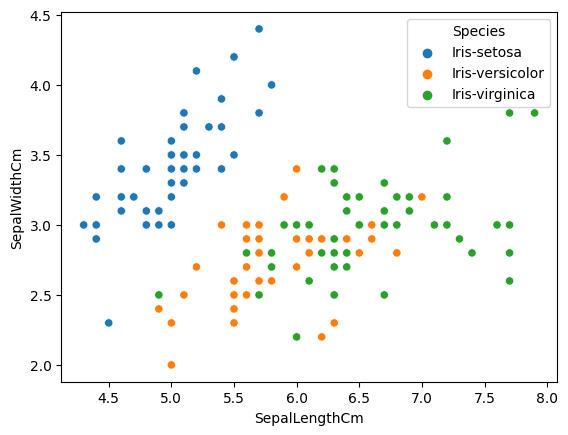

In [45]:

sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm',
                hue='Species', data=df, )

**According to the above plot
1) Iris-Setosa has smaller Sepal Length and larger Sepal Widths
2) Iris-Versicolor is the medium range of Sepal Length and Sepal Width
3) Iris-Virginica has larger sepal lengths and larger sepal width**

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

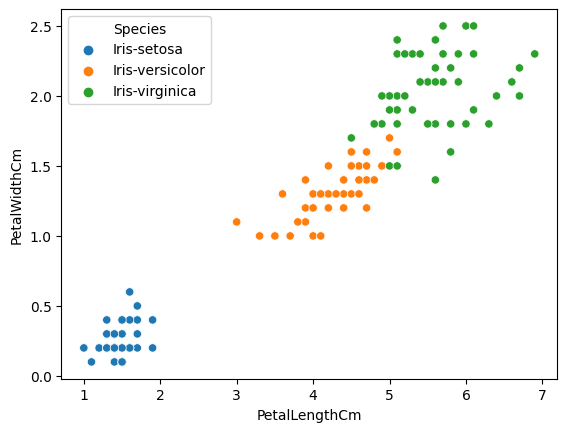

In [46]:

sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm',
                hue='Species', data=df, )

**This plot explains that Iris Setosa has smaller Petal Length and Smaller Petal width, while Iris- Versicolor lies in the middle and Iris- Virginica has Larger Petal Widtth and Smaller Petal Length**

<ipython-input-47-05caacb6ef80>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(),cmap = "YlGnBu", linecolor = 'white', linewidths = 1, annot = True)


<Axes: >

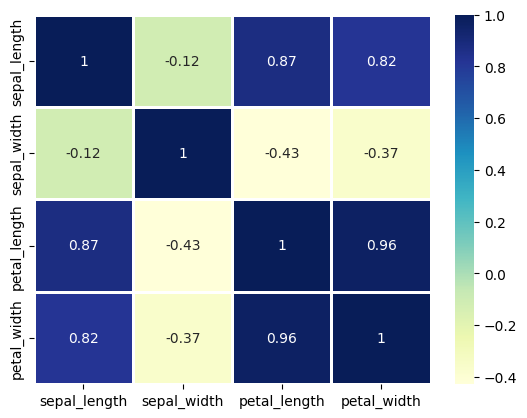

In [47]:
sns.heatmap(iris.corr(),cmap = "YlGnBu", linecolor = 'white', linewidths = 1, annot = True)


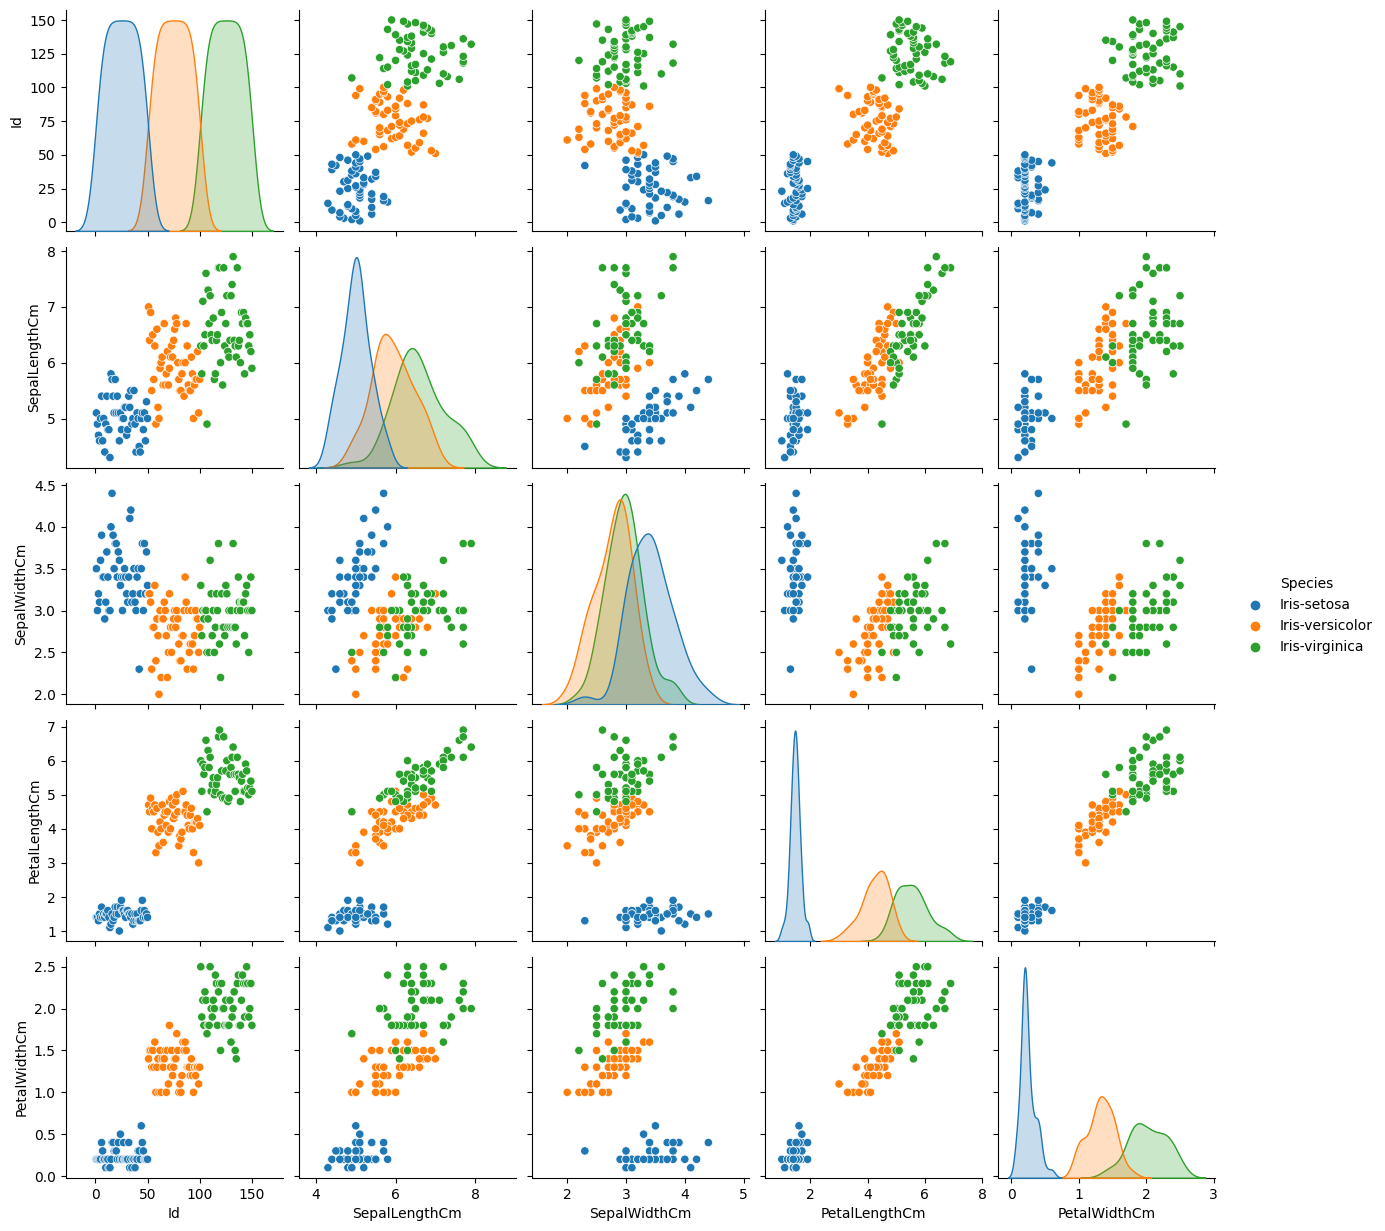

In [48]:
g = sns.pairplot(df,hue="Species")


**Droping the Id Column**

In [49]:
df=df.drop(columns="Id")

In [50]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**X contains Independent Variables and Y contains Dependent Varaibles**

In [51]:
x = df.iloc[:, :4]


In [52]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


This line selects all rows and the first four columns of the DataFrame df which are **SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm** using the iloc function.
df.iloc[:, :4] selects all rows (:) and the columns indexed from 0 to 3 (:4). **The resulting x will contain the input features for classification.**

In [53]:
y = df.iloc[:, 4]

In [54]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

This line selects all rows and the fifth column of the DataFrame df which is **(Species)**, which corresponds to the target labels for classification. Again, df.iloc[:, 4] selects all rows (:) and the column at index 4. **The resulting y will contain the target labels**

**Import train_test_split to split the data into train and test datasets.**



In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [57]:
x_train.shape

(120, 4)

**x_train has a shape of (112, 4), it means that there are 112 training samples, and each sample has 4 features or input variables.**

In [58]:
x_test.shape

(30, 4)

**x_test has a shape of (38, 4), it means that there are 38 test samples, and each sample has 4 features or input variables.**

In [59]:
y_train.shape

(120,)

In [60]:
y_test.shape

(30,)

**Creating Model - Classification**
-- Classifiying the Iris Flower Dataset using the Logistic Regression


In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
model = LogisticRegression()

In [63]:
df.isnull().sum()


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Training the model using the fit method** -- Passsing the x_train and y_train in the fit function

In [64]:
threshold = 0.5

In [65]:
model.fit(x_train,y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Predicting the results using Predict Method**

In [66]:
y_pred=model.predict(x_test)


In [67]:
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

**Finding Accuracy score of the model and the confusion matrix will predict the values**

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
cm = confusion_matrix(y_test, y_pred)

In [71]:
classifier = KNeighborsClassifier(n_neighbors=3)

In [72]:
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [73]:
acc = accuracy_score(y_test, y_pred)*100

In [74]:
print("Accuracy of the model is {:.2f}".format(acc) )


Accuracy of the model is 100.00
